<a href="https://colab.research.google.com/github/thekateee23/cs102/blob/homework06/R.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Задание №1**

1. Загрузите датасет music_genre.csv.
2. Возьмите 20 тысяч случайных строк из датасета (все остальные задания выполняйте для этих 20 тысяч строк!!!)
3. Проверьте, есть ли в датасете дублирующиеся строки. Если есть, удалите их.
4. Проверьте, есть ли а датасете строки, в которых значение в столбце artist_name – empty_field. Если есть, выведите эти строки и их количество. А затем удалите из датасета.

In [1]:
library(tidyverse)

Warning message in system("timedatectl", intern = TRUE):
“running command 'timedatectl' had status 1”
── Attaching packages ─────────────────────────────────────── tidyverse 1.3.1 ──

✔ ggplot2 3.4.1     ✔ purrr   1.0.1
✔ tibble  3.2.1     ✔ dplyr   1.1.1
✔ tidyr   1.3.0     ✔ stringr 1.4.1
✔ readr   2.1.4     ✔ forcats 1.0.0

── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()



In [2]:
data <- read.csv("music_genre.csv")

In [3]:
data <- sample_n(data, 20000, 42)

In [4]:
duplicates <- duplicated(data)
sum(duplicates)

[1] 3491

In [6]:
data <- distinct(data)

In [5]:
empty_rows <- subset(data, artist_name == "empty_field")
empty_count <- nrow(empty_rows)

if (empty_count > 0) {
  #cat("Найдено", empty_count, "строк со значением 'empty_field':\n")
  #print(empty_rows)
  
  data <- data[!data$artist_name %in% "empty_field", ]
  cat("\nУдалены строки со значением 'empty_field'.\n")
} else {
  cat("Строк со значением 'empty_field' не найдено.\n")
}


Удалены строки со значением 'empty_field'.


In [7]:
data <- unique(data)

**Вывод:**

Сделала предобработку данных согласно заданию.

**Задание №2**

1. Выведите долю каждого жанра в датасете.
2. Покажите на горизонтальной столбиковой диаграмме распределение количества треков по жанрам. Выделите контрастным цветом жанр, в котором больше всего песен.
3. Найдите самый танцевальный жанр. У самого танцевального жанра среднее значение показателя danceability должно быть наивысшим.
4. Для каждого жанра определите, какая тональность в нем преобладает – количество треков какой тональность больше (минор или мажор).

In [8]:
genre_props <- prop.table(table(data$music_genre))

cat("Доля каждого жанра в датасете:\n")
print(genre_props)

Доля каждого жанра в датасете:

              Alternative        Anime        Blues    Classical      Country 
6.364157e-05 1.007446e-01 9.807166e-02 1.011901e-01 1.001718e-01 1.039267e-01 
  Electronic      Hip-Hop         Jazz          Rap         Rock 
1.004264e-01 9.768981e-02 1.009992e-01 9.590785e-02 1.008082e-01 


In [9]:
genre_count <- data %>%
  count(music_genre) %>%
  mutate(share = n / sum(n)) %>%
  arrange(desc(share))

genre_count

music_genre,n,share
<chr>,<int>,<dbl>
Country,1633,1.039267e-01
Blues,1590,1.011901e-01
Jazz,1587,1.009992e-01
Rock,1584,1.008082e-01
Alternative,1583,1.007446e-01
Electronic,1578,1.004264e-01
Classical,1574,1.001718e-01
Anime,1541,9.807166e-02
Hip-Hop,1535,9.768981e-02


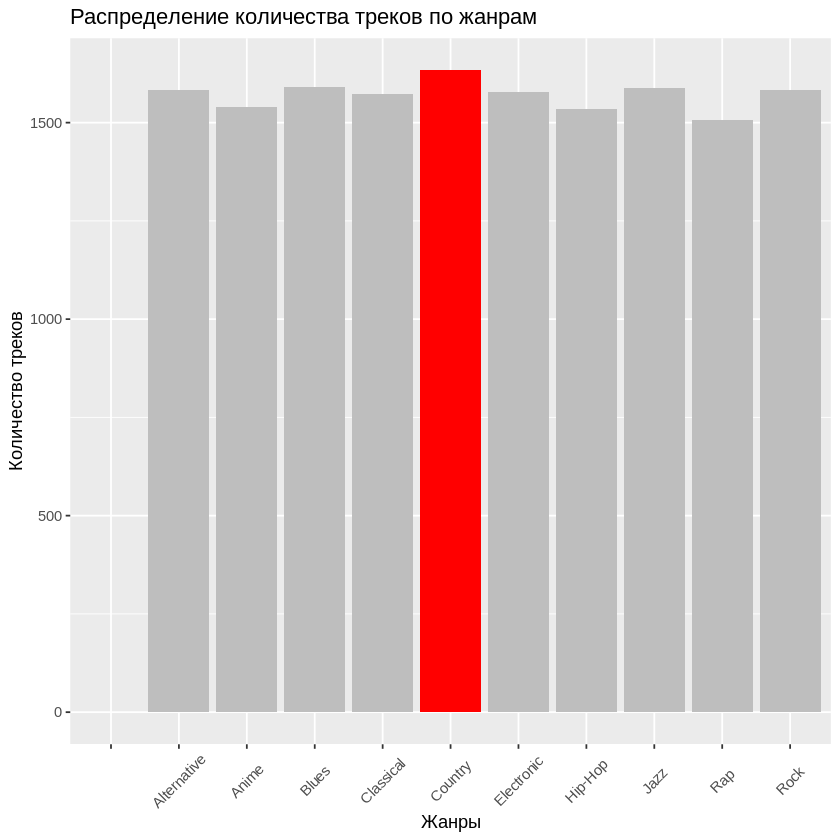

In [10]:
library(ggplot2)

genre_count <- data %>%
  group_by(music_genre) %>%
  summarize(track_count = n()) %>%
  arrange(desc(track_count))

ggplot(genre_count, aes(x = music_genre, y = track_count)) +
  geom_col(fill = ifelse(genre_count$music_genre[1] == genre_count$music_genre, "red", "grey")) + 
  labs(title = "Распределение количества треков по жанрам",
       x = "Жанры",
       y = "Количество треков") +
  theme(axis.text.x = element_text(angle = 45, vjust = 0.5))


In [11]:
most_popular_genre <- data %>%
  count(music_genre) %>%
  filter(n == max(n)) %>%
  pull(music_genre)
cat(paste("Most popular genre is", most_popular_genre, "\n"))

Most popular genre is Country 


In [12]:
danceability_by_genre <- data %>% 
  group_by(music_genre) %>% 
  summarize(mean_danceability = mean(danceability))

most_danceable_genre <- danceability_by_genre %>% 
  arrange(desc(mean_danceability)) %>% 
  head(1)

cat("Самый танцевальный жанр:", most_danceable_genre$music_genre, "\n")
cat("Среднее значение показателя danceability:", most_danceable_genre$mean_danceability, "\n")

Самый танцевальный жанр: Hip-Hop 
Среднее значение показателя danceability: 0.7214267 


`summarise()` has grouped output by 'music_genre'. You can override using the
`.groups` argument.


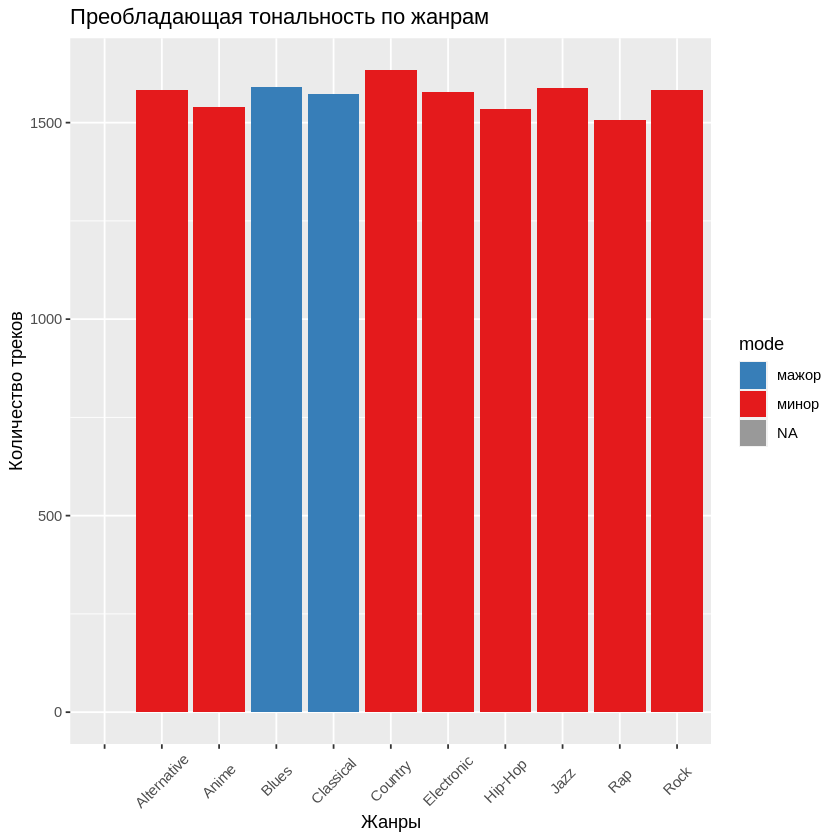

In [13]:
tonality_by_genre <- data %>%
  group_by(music_genre, key) %>%
  summarise(track_count = n()) %>%
  mutate(mode = ifelse(sum(key == "C") == 0 & sum(key == "D") == 0, "No tracks",
                       ifelse(track_count[key == "C"] < track_count[key == "D"], "major", "minor")))

ggplot(tonality_by_genre, aes(x = music_genre, y = track_count, fill = mode)) +
  geom_bar(stat = "identity") +
  labs(title = "Преобладающая тональность по жанрам", 
       x = "Жанры", y = "Количество треков") +
  scale_fill_manual(values = c("#377eb8", "#e41a1c", "#999999"), 
                    labels = c("мажор", "минор")) +
  theme(axis.text.x = element_text(angle = 45, vjust = 0.5))

**Вывод:**

1) Определила долю каждого жанра в датасете

2)показала распределение на диаграмме, больше всего треков в жанре *джаз*

3)Определила самый танцевальный жанр - это *хипхоп*

4)в *альтернативной музыке, аниме электро, хипхопе, джазе, роке и рэпе* преобладает **минор**, в *блюзе, классике, кантри* превалирует **мажор**.

**Задание №3**

1. Выведите исполнителя, у которого больше всего треков в датасете. И того, у которого их меньше всех.
2. Покажите на горизонтральной столбиковой диаграмме топ-20 исполнителей. Изучите результат и сделайте выводы.

In [14]:
most_tracks <- names(sort(table(data$artist_name), decreasing = TRUE)[1])
most_count <- max(table(data$artist_name))
cat("Исполнитель с наибольшим количеством треков:", most_tracks, "(", most_count, "треков)\n")

least_tracks <- names(sort(table(data$artist_name))[1])
least_count <- min(table(data$artist_name))
cat("Исполнитель с наименьшим количеством треков:", least_tracks, "(", least_count, "трек)\n")

Исполнитель с наибольшим количеством треков: Nobuo Uematsu ( 138 треков)
Исполнитель с наименьшим количеством треков:  ( 1 трек)


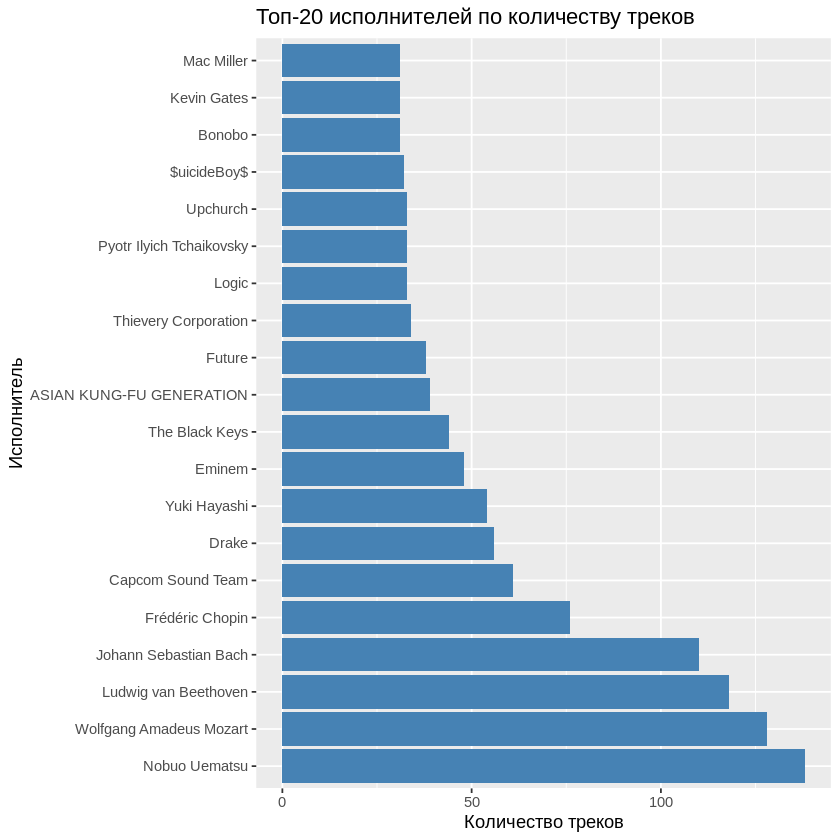

In [15]:
library(ggplot2)

top_artists <- data %>%
  group_by(artist_name) %>%
  summarize(total_songs = n()) %>%
  top_n(20, total_songs) %>%
  arrange(desc(total_songs))

ggplot(top_artists, aes(y = reorder(artist_name, -total_songs), x = total_songs)) +
  geom_bar(stat = "identity", fill = "steelblue") +
  theme(axis.text.y = element_text(hjust = 1)) +
  ggtitle("Топ-20 исполнителей по количеству треков") +
  xlab("Количество треков") +
  ylab("Исполнитель")



**Вывод:**

1) Определила исполнителя с наибольшим и наименьшим количеством треков, отобразила это на графике.

**Задание №4**

1. Постройте корреляционную матрицу для характеристик треков. Между какими характеристиками сильная корреляция? Между какими слабая?
2. Есть ли характеристики, между которыми корреляции практически нет.
Посчитайте корреляцию между популярностью (popularity) и длиной названия трека.

In [16]:
install.packages("corrplot")
library(corrplot)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

corrplot 0.92 loaded



In [17]:
install.packages("palmerpenguins")

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)



In [18]:
data$tempo <- as.numeric(data$tempo)


Warning message in eval(expr, envir, enclos):
“NAs introduced by coercion”


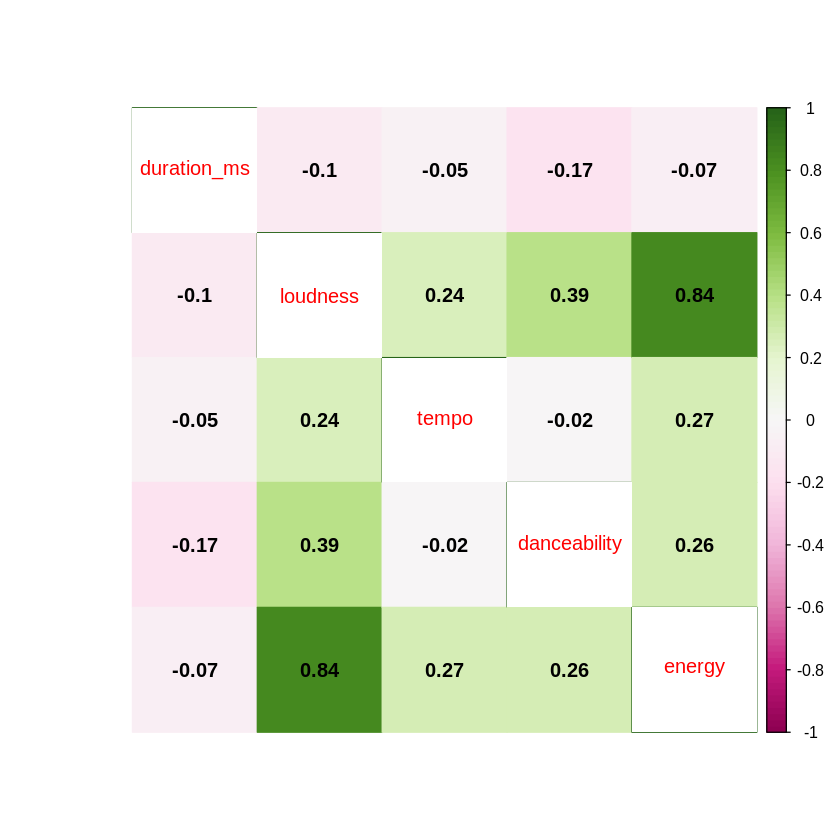

In [19]:
library(corrplot)
library(RColorBrewer)

data_clean <- na.omit(data[c('duration_ms', 'loudness', 'tempo', 'danceability', 'energy')])
data_clean$tempo <- as.numeric(data_clean$tempo)

cor_mat <- cor(data_clean)

col_ramp <- colorRampPalette(brewer.pal(11, 'PiYG'))
corrplot(cor_mat, method = "color", tl.pos = "d", addCoef.col = "black", col = col_ramp(100))

In [20]:
sum(is.na(data$popularity))

[1] 1

In [21]:
data <- na.omit(data)

In [22]:
cor(data$popularity, nchar(as.character(data$track_name)))

[1] -0.2208097

**Вывод:**

1) наибольшая корреляция между громкостью и энергичностью, так же она достатчно высока у связи с танцевальностью и громкостью, энергичностью и танцевальностью.
Менее сильная она у всего, что связано с длительностью. 


2) Определила корреляцию между популярностью трека и длиной трека, она отрицательная, соответственно, корреляция слабая.

**Задание №5**

Покажите на ящиковой диаграмме отношение популярности треков к жанру. Какие жанры похожи между собой?

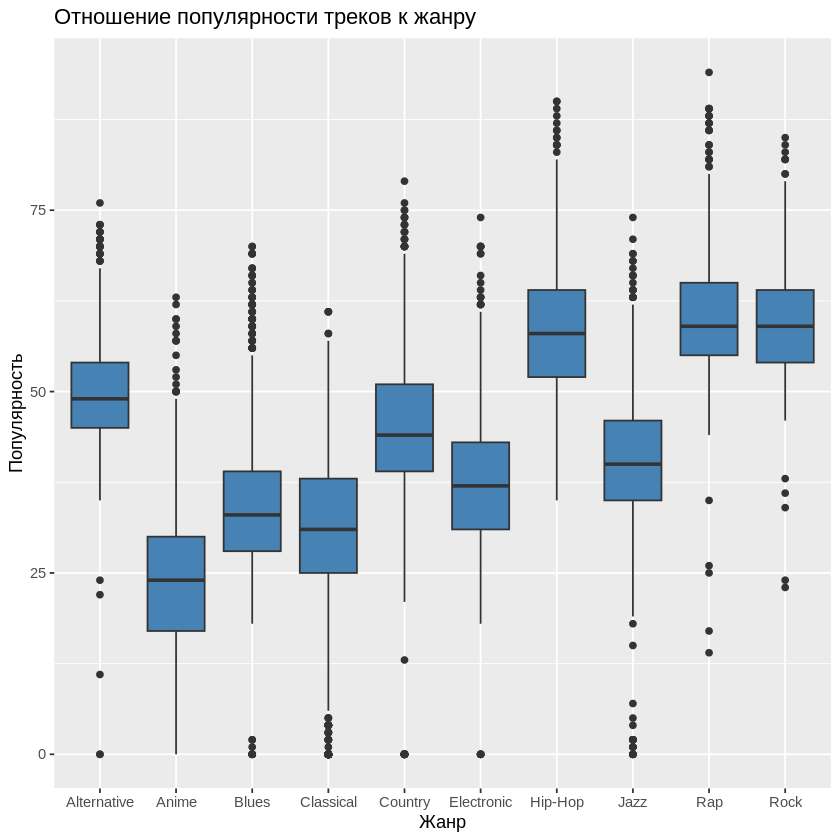

In [23]:
library(ggplot2)

ggplot(data, aes(x = music_genre, y = popularity)) +
  geom_boxplot(fill = "steelblue") +
  ggtitle("Отношение популярности треков к жанру") +
  xlab("Жанр") +
  ylab("Популярность")

**Вывод:**

Построила диаграмму "Ящик с усами"; наиболее похожими жанрами являются рэп и рок, блюз и классика.

**Задание №7**

На вертикальной столбиковой диаграмме для самого популярного (popularity) и самого непопулярного жанров покажите средние значения по всем характеристикам. Отрицательные и положительные значения характеристик показывайте разными цветами.

In [24]:
sum(is.na(data))

[1] 0

In [25]:
data <- na.omit(data)

In [26]:
non_numeric_cols <- c("instance_id", "artist_name", "track_name")
numeric_cols <- setdiff(colnames(data), non_numeric_cols)

for (col in numeric_cols) {
  data[[col]] <- as.numeric(gsub("[^0-9.]", "", data[[col]]))
}


In [27]:
non_numeric_cols <- c("artist_name", "track_name")
numeric_cols <- setdiff(names(data), non_numeric_cols)

data[, numeric_cols] <- apply(data[, numeric_cols], 2, as.numeric)

In [28]:
data$acousticness <- as.numeric(data$acousticness)
data$danceability <- as.numeric(data$danceability)
data$energy <- as.numeric(data$energy)
data$instrumentalness <- as.numeric(data$instrumentalness)
data$liveness <- as.numeric(data$liveness)
data$speechiness <- as.numeric(data$speechiness)
data$valence <- as.numeric(data$valence)

In [29]:
install.packages("dplyr")
install.packages("ggplot2")
install.packages("gridExtra")


Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)



Warning message:
“There were 2 warnings in `summarise()`.
The first warning was:
ℹ In argument: `artist_name = (function (x, ...) ...`.
ℹ In group 1: `music_genre = NA`.
Caused by warning in `mean.default()`:
! argument is not numeric or logical: returning NA
ℹ Run `dplyr::last_dplyr_warnings()` to see the 1 remaining warning.”
Warning message:
“There were 2 warnings in `summarise()`.
The first warning was:
ℹ In argument: `artist_name = (function (x, ...) ...`.
ℹ In group 1: `music_genre = NA`.
Caused by warning in `mean.default()`:
! argument is not numeric or logical: returning NA
ℹ Run `dplyr::last_dplyr_warnings()` to see the 1 remaining warning.”
Warning message:
“Removed 2 rows containing missing values (`position_stack()`).”
Warning message:
“Removed 2 rows containing missing values (`position_stack()`).”


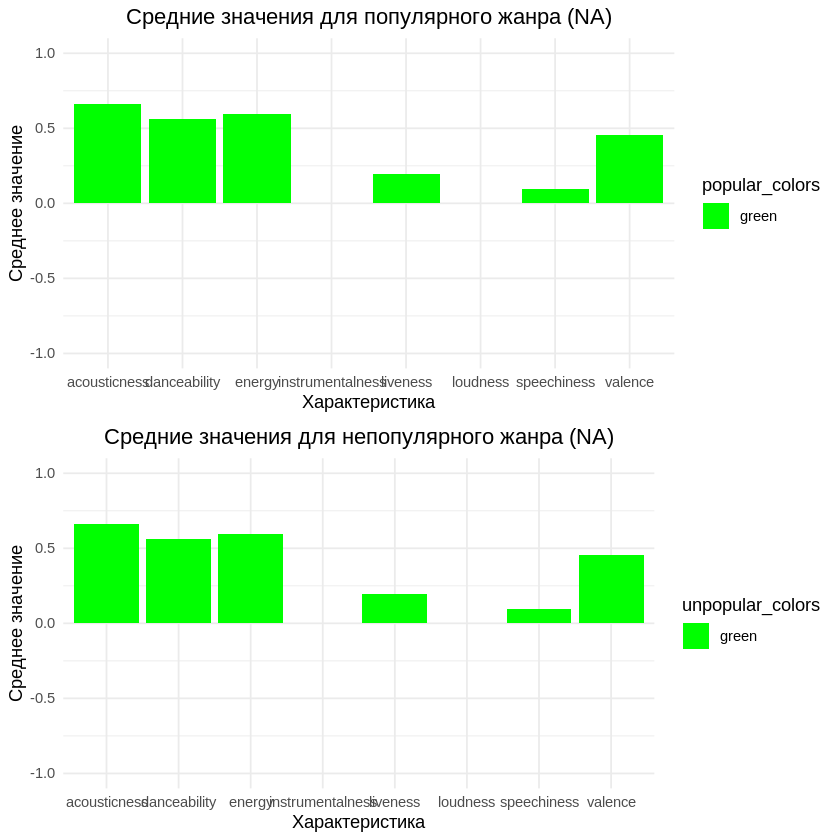

In [30]:
library(dplyr)
library(ggplot2)

popular_genres <- data %>% 
  group_by(music_genre) %>% 
  summarize_all(mean) %>% 
  arrange(desc(popularity)) %>% 
  slice(1)

unpopular_genres <- data %>% 
  group_by(music_genre) %>% 
  summarize_all(mean) %>% 
  arrange(desc(popularity)) %>% 
  slice_tail(n = 1)

characteristics <- c('acousticness', 'danceability', 'energy', 'instrumentalness', 'liveness', 'loudness', 'speechiness', 'valence')

popular_means <- popular_genres[, characteristics] %>% 
  unlist() %>% 
  as.numeric()

popular_colors <- ifelse(popular_means < 0, 'red', ifelse(popular_means == 0, 'grey', 'green'))

popular_plot <- ggplot(data.frame(characteristics, popular_means), aes(x=characteristics, y=popular_means, fill=popular_colors)) +
  geom_bar(stat='identity') + 
  scale_fill_manual(values=popular_colors) +
  ggtitle(paste("Средние значения для популярного жанра (", popular_genres$music_genre, ")", sep="")) + 
  ylim(-1, 1) +
  xlab('Характеристика') + 
  ylab('Среднее значение') + 
  theme_minimal() + 
  theme(plot.title = element_text(hjust = 0.5))

unpopular_means <- unpopular_genres[, characteristics] %>% 
  unlist() %>% 
  as.numeric()

unpopular_colors <- ifelse(unpopular_means < 0, 'red', ifelse(unpopular_means == 0, 'grey', 'green'))

unpopular_plot <- ggplot(data.frame(characteristics, unpopular_means), aes(x=characteristics, y=unpopular_means, fill=unpopular_colors)) +
  geom_bar(stat='identity') + 
  scale_fill_manual(values=unpopular_colors) +
  ggtitle(paste("Средние значения для непопулярного жанра (", unpopular_genres$music_genre, ")", sep="")) + 
  ylim(-1, 1) +
  xlab('Характеристика') + 
  ylab('Среднее значение') + 
  theme_minimal() + 
  theme(plot.title = element_text(hjust = 0.5))

gridExtra::grid.arrange(popular_plot, unpopular_plot, ncol=1)


**Вывод:**

Построила вертикальную диаграмму, выделила разными цветами положительные и отрицательные величины в самом популярном и самом непопулярном жанрам по всем характеристикам.

**Задание №8**

1. Добавьте в данные категориальный столбец длительность_трека, в котором будут значения: "короткая" (<=3min), "средняя" (>3min, <=5min), "длинная" (>5min).
2. Покажите график плотности распределения данных в столбце loudness, сгруппированных по категориям длительности.
3. На круговой диаграмме покажите численное соотношение треков разной длительности.

In [31]:
install.packages("plotly")

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

also installing the dependencies ‘Rcpp’, ‘later’, ‘htmlwidgets’, ‘lazyeval’, ‘crosstalk’, ‘promises’




In [32]:
install.packages("ggplot2")

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)



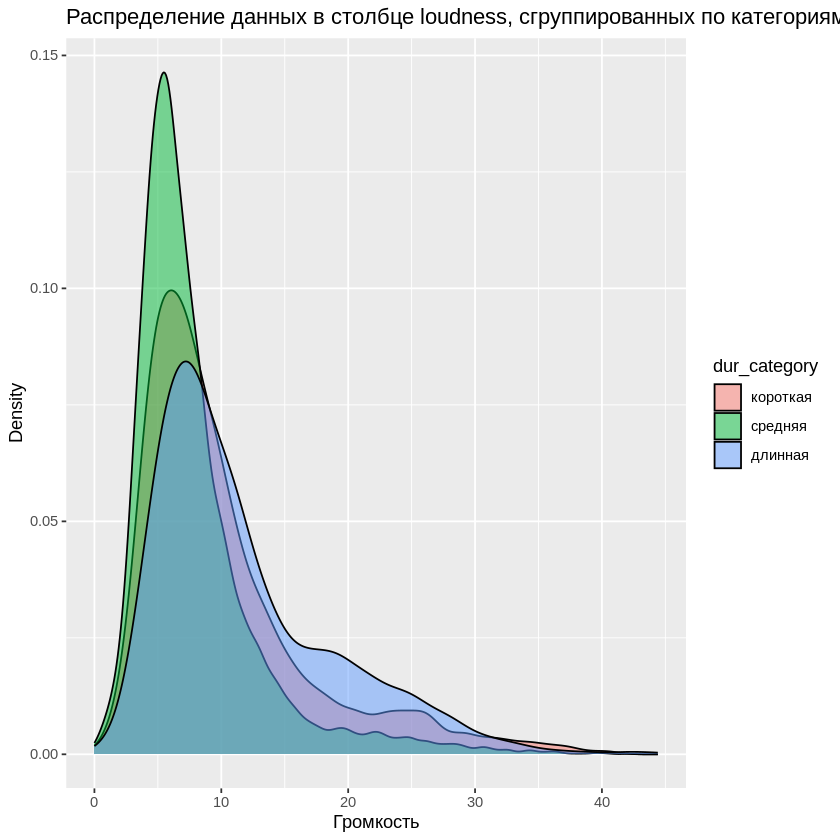

In [33]:
library(dplyr)
library(ggplot2)

data <- data %>%
  mutate(dur_category = cut(duration_ms/60000, 
                             breaks = c(0, 3, 5, Inf), 
                             labels = c("короткая", "средняя", "длинная")))

ggplot(data, aes(x = loudness, fill = dur_category)) +
  geom_density(alpha = 0.5) +
  xlab("Громкость") +
  ylab("Density") +
  ggtitle("Распределение данных в столбце loudness, сгруппированных по категориям длительности")

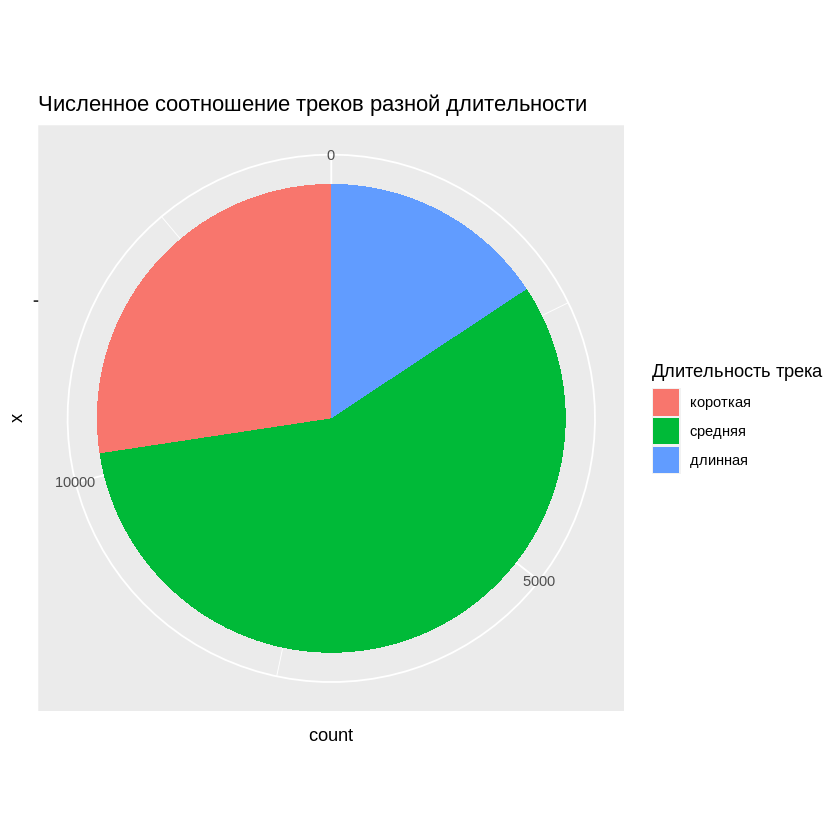

In [34]:
ggplot(data, aes(x = "", fill = dur_category)) +
  geom_bar(width = 1) +
  coord_polar(theta = "y") +
  labs(fill = "Длительность трека") +
  ggtitle("Численное соотношение треков разной длительности")

**Вывод:**

1) добавила столбец, позволяющий категоризировать треки по их длительности

2)сделала распределение по громкости исходя из длительности; преобладают песни средней длины, короткие на втором месте, длинные, соответственно, на третьем.

3)сделала диаграмму, показывающую соотношение длины и количества треков; распределение по местам оказалось аналогичным предыдущему пункту.